In [1]:
import torch

torch.__version__

'1.13.1+cpu'

## 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4, 2) # 4 by 2 empty tensor create
print(x)

tensor([[6.1200e-04, 4.8419e+30],
        [7.5321e+28, 6.7131e+22],
        [4.4591e+30, 1.6611e+22],
        [1.9346e-19, 5.2809e-04]])


무작위로 초기화된 텐서

In [3]:
x = torch.rand(4, 2)
print(x)

tensor([[0.3751, 0.5354],
        [0.7223, 0.7541],
        [0.7882, 0.8382],
        [0.1273, 0.1508]])


Data type(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [5]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [6]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [7]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 1.3063, -0.7622,  0.0361,  1.9687],
        [-1.0511, -1.7433, -0.8490, -1.6857]])


텐서의 크기 계산

In [8]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입

In [9]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [10]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [11]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [12]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## CUDA Tensors

In [13]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.3423])
0.34227174520492554
torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # torch.device() 는 'cuda'를 넣으며 GPU, 'cpu'를 넣으면 CPU가 됨
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cpu
tensor([1.])
tensor([0.3423])
tensor([1.3423])
tensor([1.3423], dtype=torch.float64)


## 다차원 텐서 표현

### 0D Tensor(Scalar)

In [15]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor(Vector)

In [16]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor(Matrix)

In [17]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor

In [18]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


## 텐서의 연산(Operations)

* `abs` : 절댓값
* `ceil` : 올림 (양수 : 소수부 날리고 정수부에 +1, 음수 : 소수부만 날림)
* `floor` : 내림 (양수 : 소수부만 날림, 음수 : 소수부 날리고 정수부에 +1)
* `clamp` : (tensor, 최소, 최대) 최소와 최대 범위까지만 표현

In [19]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[ 0.3424, -0.6570]])
tensor([[0.3424, 0.6570]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.3424, -0.5000]])


* `min` : 최소
* `max` : 최대
* `mean` : 평균
* `std` : 표준편차
* `prod` : 곱
* `unique` : 유일값

In [20]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[ 0.3424, -0.6570]])
tensor(-0.6570)
tensor(0.3424)
tensor(-0.1573)
tensor(0.7067)
tensor(-0.2250)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 `argmax` 와 `argmin`도 함께 리턴  
     - `argmax` : 최대 값을 가진 인덱스    <br>  - `argmin` : 최소 값을 가진 인덱스

In [21]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.4644, 0.0485],
        [0.8125, 0.5672]])
torch.return_types.max(
values=tensor([0.8125, 0.5672]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.4644, 0.8125]),
indices=tensor([0, 0]))


In [22]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.4644, 0.0485],
        [0.8125, 0.5672]])
torch.return_types.min(
values=tensor([0.4644, 0.0485]),
indices=tensor([0, 0]))
torch.return_types.min(
values=tensor([0.0485, 0.5672]),
indices=tensor([1, 1]))


* `torch.add` : 덧셈

In [23]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)

tensor([[0.7487, 0.1566],
        [0.1703, 0.2708]])
tensor([[0.2191, 0.0558],
        [0.0245, 0.6626]])


In [24]:
print(x + y)
print(torch.add(x, y))

tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])


In [25]:
result = torch.empty(2, 4)
torch.add(x, y, out=result) # out 인자는 result에 결과 값을 넣어주라는 의미
print(result)

tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])


C:\Users\LEEKEUN\anaconda3\envs\AIS_Lab\lib\site-packages\ipykernel_launcher.py:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  


* in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _(under bar)가 붙음

In [26]:
print(x)
print(y)
y.add_(x) # x 와 y 를 더한 후 그 값을 y 에 넣어줘
print(y)

tensor([[0.7487, 0.1566],
        [0.1703, 0.2708]])
tensor([[0.2191, 0.0558],
        [0.0245, 0.6626]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])


* `torch.sub` : 뺄셈

In [27]:
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub_(y))

tensor([[0.7487, 0.1566],
        [0.1703, 0.2708]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])


* `torch.mul` : 곱셈

In [28]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul_(y))

tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])
tensor([[-0.2120, -0.0118],
        [-0.0048, -0.6184]])
tensor([[-0.2120, -0.0118],
        [-0.0048, -0.6184]])
tensor([[-0.2120, -0.0118],
        [-0.0048, -0.6184]])


* `torch.div` : 나눗셈

In [29]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div_(y))

tensor([[-0.2120, -0.0118],
        [-0.0048, -0.6184]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])


* `torch.mm` : 내적(dot product)

In [30]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # Singular Value Decomposition : 행렬을 특정한 구조로 분해하는 방식

tensor([[-0.2191, -0.0558],
        [-0.0245, -0.6626]])
tensor([[0.9677, 0.2124],
        [0.1948, 0.9334]])
tensor([[-0.2229, -0.0986],
        [-0.1528, -0.6236]])
tensor([[-0.2229, -0.0986],
        [-0.1528, -0.6236]])
torch.return_types.svd(
U=tensor([[ 0.2456,  0.9694],
        [ 0.9694, -0.2456]]),
S=tensor([0.6606, 0.1876]),
V=tensor([[-0.3071, -0.9517],
        [-0.9517,  0.3071]]))


## 텐서의 조작(Manipulations)

인덱싱(Indexing) : NumPy처럼 인덱싱 형태로 사용 가능

In [31]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


* `view` : 텐서의 크기(size)나 모양(shape)을 변경  
   *- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
  <br>* - -1로 설정되면 계산을 통해 해당 크기 값을 유

In [32]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1)
print(z)

tensor([[-1.1529,  0.5183, -0.9476,  1.1014, -1.3798],
        [ 1.1913, -0.5726,  0.1228,  0.2251, -1.0073],
        [ 1.0755, -0.1736,  1.3406, -0.3422, -0.9331],
        [ 1.1545, -1.1181, -1.3359, -1.1734, -0.2662]])
tensor([-1.1529,  0.5183, -0.9476,  1.1014, -1.3798,  1.1913, -0.5726,  0.1228,
         0.2251, -1.0073,  1.0755, -0.1736,  1.3406, -0.3422, -0.9331,  1.1545,
        -1.1181, -1.3359, -1.1734, -0.2662])
tensor([[-1.1529,  0.5183, -0.9476,  1.1014],
        [-1.3798,  1.1913, -0.5726,  0.1228],
        [ 0.2251, -1.0073,  1.0755, -0.1736],
        [ 1.3406, -0.3422, -0.9331,  1.1545],
        [-1.1181, -1.3359, -1.1734, -0.2662]])


* `item` : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음
* 단 스칼라 값 하나만 존재해야 `item()` 사용 가능

In [33]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.3746])
0.37459659576416016
torch.float32


In [34]:
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([-0.6186, -0.5262])
torch.float32


* `squeeze` : 차원을 축소(제거)

In [35]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.0796, 0.4437, 0.0147],
         [0.9737, 0.7915, 0.8660],
         [0.3263, 0.7588, 0.0251]]])
torch.Size([1, 3, 3])


In [36]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.0796, 0.4437, 0.0147],
        [0.9737, 0.7915, 0.8660],
        [0.3263, 0.7588, 0.0251]])
torch.Size([3, 3])


* `unsqueeze` : 차원을 증가(생성)

In [37]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.8609, 0.5884, 0.9679],
        [0.2597, 0.2063, 0.8455],
        [0.2571, 0.0883, 0.8404]])
torch.Size([3, 3])


In [38]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.8609, 0.5884, 0.9679],
         [0.2597, 0.2063, 0.8455],
         [0.2571, 0.0883, 0.8404]]])
torch.Size([1, 3, 3])


In [39]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.8609],
         [0.5884],
         [0.9679]],

        [[0.2597],
         [0.2063],
         [0.8455]],

        [[0.2571],
         [0.0883],
         [0.8404]]])
torch.Size([3, 3, 1])


* `stack` : 텐서간 결합

In [40]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


* `cat` : 텐서를 결합하는 메소드(concatenate)
    * 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
    * 해당 차원을 늘려준 후 결합

In [41]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0)
print(c)
print(c.size())

tensor([[[ 1.2839, -0.1088,  0.5900],
         [-1.7565, -1.2315,  0.4737],
         [-1.3693, -1.7780,  1.1132]]])
tensor([[[-0.4909, -0.6911, -0.8058],
         [-0.0179,  0.3798, -2.0642],
         [ 0.9168,  1.0032,  2.0772]]])
tensor([[[ 1.2839, -0.1088,  0.5900],
         [-1.7565, -1.2315,  0.4737],
         [-1.3693, -1.7780,  1.1132]],

        [[-0.4909, -0.6911, -0.8058],
         [-0.0179,  0.3798, -2.0642],
         [ 0.9168,  1.0032,  2.0772]]])
torch.Size([2, 3, 3])


In [42]:
c = torch.cat((a, b), dim=1)
print(c)
print(c.size())

tensor([[[ 1.2839, -0.1088,  0.5900],
         [-1.7565, -1.2315,  0.4737],
         [-1.3693, -1.7780,  1.1132],
         [-0.4909, -0.6911, -0.8058],
         [-0.0179,  0.3798, -2.0642],
         [ 0.9168,  1.0032,  2.0772]]])
torch.Size([1, 6, 3])


In [43]:
c = torch.cat((a, b), dim=2)
print(c)
print(c.size())

tensor([[[ 1.2839, -0.1088,  0.5900, -0.4909, -0.6911, -0.8058],
         [-1.7565, -1.2315,  0.4737, -0.0179,  0.3798, -2.0642],
         [-1.3693, -1.7780,  1.1132,  0.9168,  1.0032,  2.0772]]])
torch.Size([1, 3, 6])


* `chunk` : 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [44]:
tensor = torch.rand(3, 6)
print(tensor)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.5344, 0.2893, 0.4917, 0.1114, 0.8696, 0.3075],
        [0.8169, 0.5094, 0.3772, 0.1933, 0.7935, 0.6205],
        [0.1063, 0.5078, 0.3880, 0.2896, 0.2269, 0.2441]])
tensor([[0.5344, 0.2893],
        [0.8169, 0.5094],
        [0.1063, 0.5078]])
tensor([[0.4917, 0.1114],
        [0.3772, 0.1933],
        [0.3880, 0.2896]])
tensor([[0.8696, 0.3075],
        [0.7935, 0.6205],
        [0.2269, 0.2441]])


* `split` : `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [45]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.4327, 0.2769, 0.6791, 0.2366, 0.2045, 0.3610],
        [0.0797, 0.4776, 0.9486, 0.8115, 0.5361, 0.2789],
        [0.7893, 0.9248, 0.3183, 0.1468, 0.1420, 0.4677]])
tensor([[0.4327, 0.2769, 0.6791],
        [0.0797, 0.4776, 0.9486],
        [0.7893, 0.9248, 0.3183]])
tensor([[0.2366, 0.2045, 0.3610],
        [0.8115, 0.5361, 0.2789],
        [0.1468, 0.1420, 0.4677]])


- torch ↔ numpy
    - Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
        - `numpy()`
        - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변

In [46]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [47]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [48]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [49]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop` 를  위해 미분 값을 자동으로 계산

`reqires_grad` 속성을 `True` 로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()` 를 호출하여 연산 기록으로부터 분리

In [50]:
a = torch.randn(3, 3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 0.0736, -1.1531, -0.2381],
        [-0.1062,  1.4847,  4.8953],
        [-6.4606,  3.0476, -0.5370]])
False


`requires_grad_(…)` 는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn` : 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [51]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum() # grad_fn=<SumBackward0> : 덧셈을 하였다는 기
print(b)
print(b.grad_fn)

True
tensor(78.8863, grad_fn=<SumBackward0>)


## 기울기(Gradient)

In [52]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [53]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [54]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()` 를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적

In [55]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad` : **data**가 거쳐온 **layer**에 대한 미분값 저

In [56]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [57]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  755.2898, -1141.2203,   168.1253], grad_fn=<MulBackward0>)


In [58]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


`with torch.no_grad()` 를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()` 로 감싸면 기울기 계산은 필요 없지만, `requires_grad=True` 로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유

In [59]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


`detach()` : 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [60]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 예제

- 계산 흐름 $a$ → $b$ → $c$ → $out$

 $\frac{\partial out}{\partial a} = ?$

- `backward()` 를 통해 $a$ ← $b$ ← $c$ ← $out$을 계산하면  $\frac{\partial out}{\partial a}$값이 `a.grad` 에 채워

In [61]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [62]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [63]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b$ = $a$ + 2

In [64]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c$ = $b^2$

In [65]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [66]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [67]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


**a**의 `grad_fn`이 **None**인 이유는 직접적으로 계산한 부분이 없었기 때문

In [68]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [69]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


C:\Users\LEEKEUN\anaconda3\envs\AIS_Lab\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:485.)
  


In [70]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


C:\Users\LEEKEUN\anaconda3\envs\AIS_Lab\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:485.)
  


In [71]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


C:\Users\LEEKEUN\anaconda3\envs\AIS_Lab\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:485.)
  


# 데이터 준비
파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능  
- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)  
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html  
  - Text Dataset: https://pytorch.org/text/stable/datasets.html  
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html  
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [72]:
from torch.utils.data import Dataset, DataLoader

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`:전처리할 때 사용하는 메소드
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행 진행

In [179]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [74]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [75]:
trainset = datasets.MNIST(root='./Dataset',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='./Dataset',
                          train=False, download=True,
                          transform=mnist_transform)

`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [76]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [77]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([8, 1, 28, 28]) torch.Size([8])


In [78]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

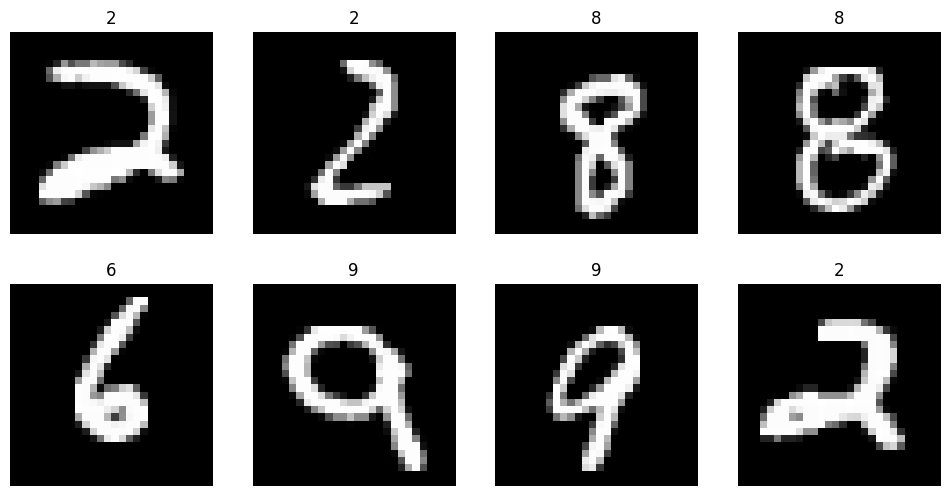

In [79]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의(layer) 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [80]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [81]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-0.5187,  1.0004,  1.2915,  ..., -1.4790, -1.3033,  0.4100],
        [-1.5256,  0.4343, -0.4901,  ...,  0.0916,  0.6540, -1.0347],
        [-1.8174, -1.1821,  1.1818,  ..., -0.2761,  1.0351,  0.8046],
        ...,
        [-1.2804,  0.3830, -1.0442,  ..., -1.0472, -0.4502,  0.0612],
        [ 1.6016,  0.7784,  0.3429,  ..., -0.2541,  0.7220, -0.1275],
        [ 0.8605, -1.5660,  0.9444,  ...,  0.1774, -0.4878,  0.5934]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.8483, -0.8412, -0.3131,  ..., -0.6208,  0.0254, -0.3057],
        [ 0.0469,  0.4282, -0.3459,  ..., -0.1870, -0.0932, -0.1974],
        [-0.2103, -0.2795, -0.0534,  ...,  0.3440,  0.5566,  0.0571],
        ...,
        [-0.2409, -0.5497, -0.0191,  ..., -0.2822, -0.4413, -0.7814],
        [ 0.7702, -0.0773, -0.2367,  ...,  1.0234, -0.2750,  0.6784],
        [ 0.6729,  0.0278,  0.0528,  ...,  0.9730,  0.1305, -0.7698]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [82]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [83]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=2, padding=(4, 2))
m = nn.Conv2d(16, 33, (3,5), stride=2, padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 2), padding=(4, 2), dilation=(3, 1))


In [84]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 50])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [85]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [86]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [87]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [88]:
weight = weight.detach()

In [89]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

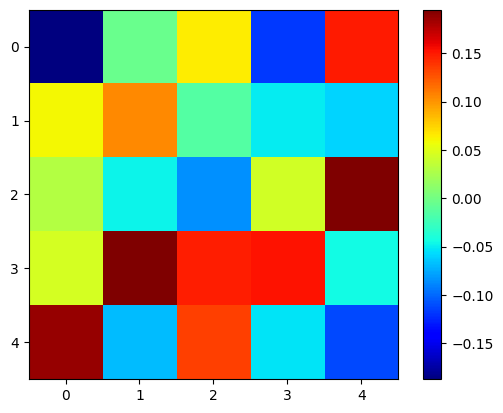

In [90]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [91]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [92]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

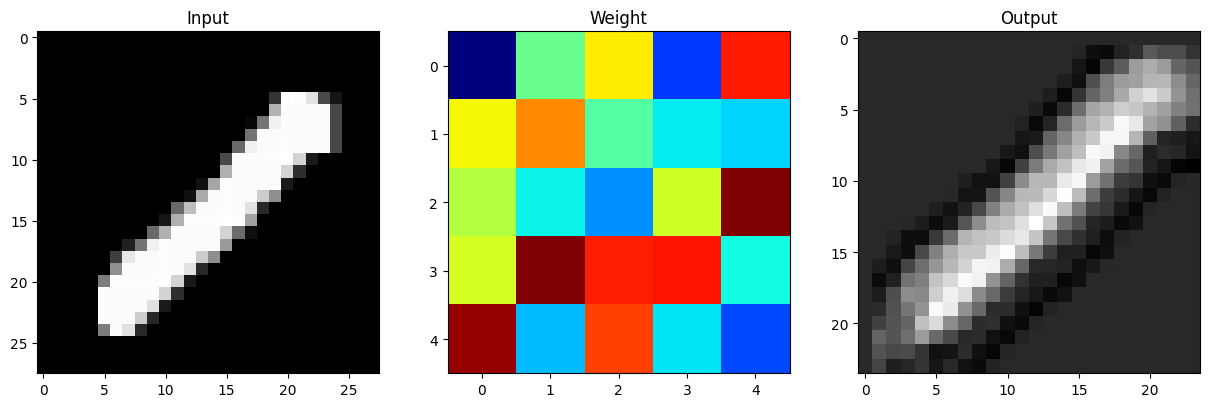

In [93]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [94]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [95]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

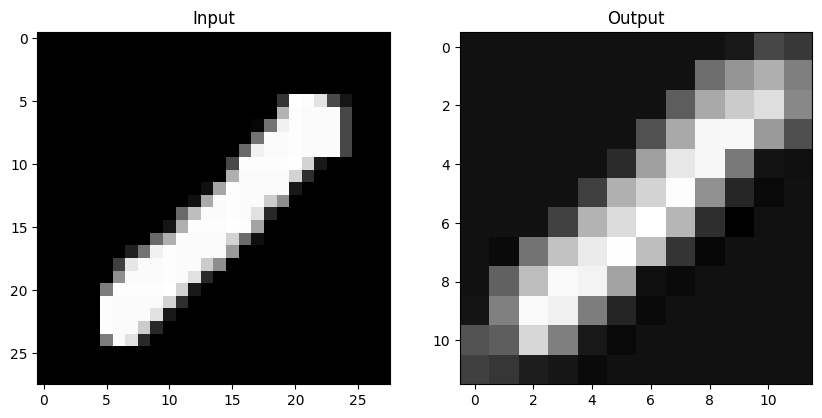

In [96]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [97]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [98]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [99]:
lin

tensor([[-0.1218, -0.3318,  0.0119, -0.1918, -0.0443, -0.2461,  0.0825,  0.0156,
         -0.4524, -0.1732]], grad_fn=<AddmmBackward0>)

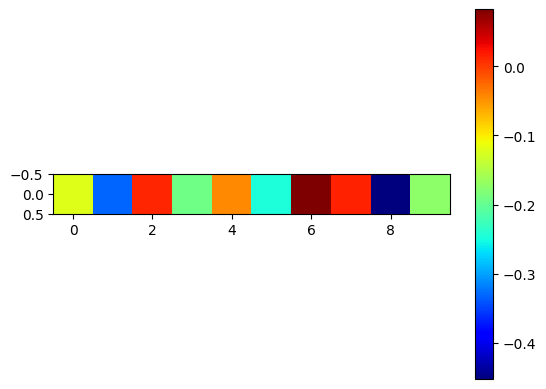

In [100]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [101]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.1110, 0.0795, 0.1258, 0.1961, 0.0739, 0.0837, 0.0583, 0.1592, 0.0563,
         0.0561]])

In [102]:
np.sum(softmax.numpy())

1.0

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [103]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [104]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [105]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = slef.activation(x)
        return x

In [106]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [107]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [108]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [109]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [118]:
!pip install torchmetrics

In [123]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.1010, 0.0258, 0.0282, 0.7312, 0.1137],
        [0.0215, 0.0915, 0.4964, 0.1778, 0.2128],
        [0.1641, 0.2061, 0.0742, 0.5133, 0.0422],
        [0.1418, 0.3083, 0.0978, 0.3052, 0.1469],
        [0.1289, 0.5492, 0.0170, 0.0301, 0.2748],
        [0.5453, 0.0602, 0.1932, 0.0344, 0.1668],
        [0.0823, 0.0762, 0.0707, 0.0176, 0.7532],
        [0.0682, 0.5202, 0.3008, 0.0698, 0.0410],
        [0.2509, 0.1159, 0.3579, 0.1894, 0.0859],
        [0.2633, 0.4671, 0.0245, 0.0668, 0.1784]]) tensor([0, 1, 4, 3, 3, 0, 4, 0, 0, 4])
tensor(0.2000)


In [126]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(acc)
    
acc = metric.compute()
print(acc)

tensor(0.)
tensor(0.1000)
tensor(0.2000)
tensor(0.3000)
tensor(0.4000)
tensor(0.3000)
tensor(0.4000)
tensor(0.2000)
tensor(0.4000)
tensor(0.1000)
tensor(0.2400)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

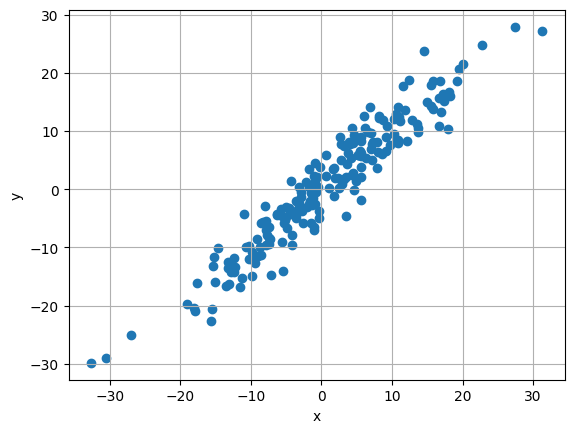

In [141]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
# print(X)
# print(y)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [166]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [167]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.0460]], requires_grad=True), Parameter containing:
tensor([-0.2792], requires_grad=True)]


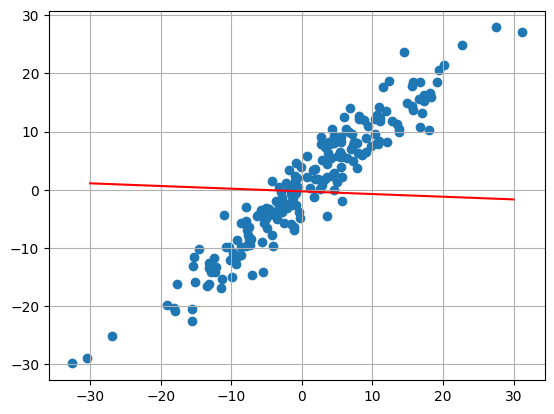

In [168]:
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [169]:
import torch.optim as optim
creterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [170]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = creterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()
    
    optimizer.step()

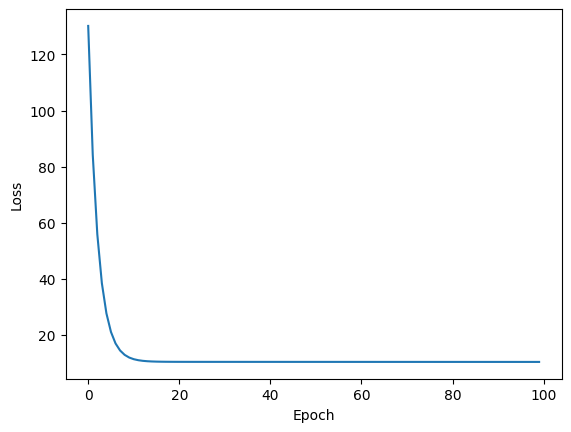

In [171]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

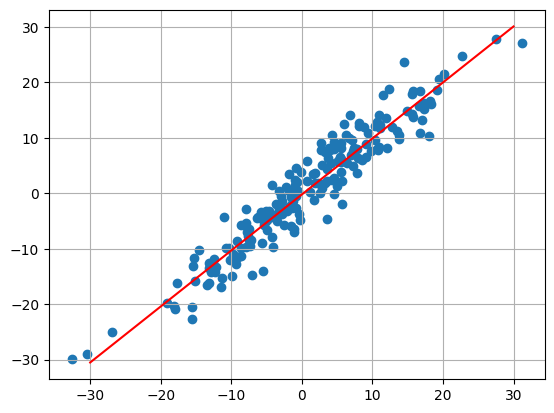

In [172]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [174]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [177]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

In [181]:
trainset = datasets.FashionMNIST(root='./Dataset/',
                                train=True, download=True,
                                transform=transform)

testset = datasets.FashionMNIST(root='./Dataset/',
                                train=False, download=True,
                                transform=transform)

100.0%

Extracting ./Dataset/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./Dataset/FashionMNIST\raw


111.0%

Extracting ./Dataset/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./Dataset/FashionMNIST\raw


100.0%

Extracting ./Dataset/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./Dataset/FashionMNIST\raw


159.1%

Extracting ./Dataset/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./Dataset/FashionMNIST\raw
Processing...
Done!


C:\Users\LEEKEUN\anaconda3\envs\AIS_Lab\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:205.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [182]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [183]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

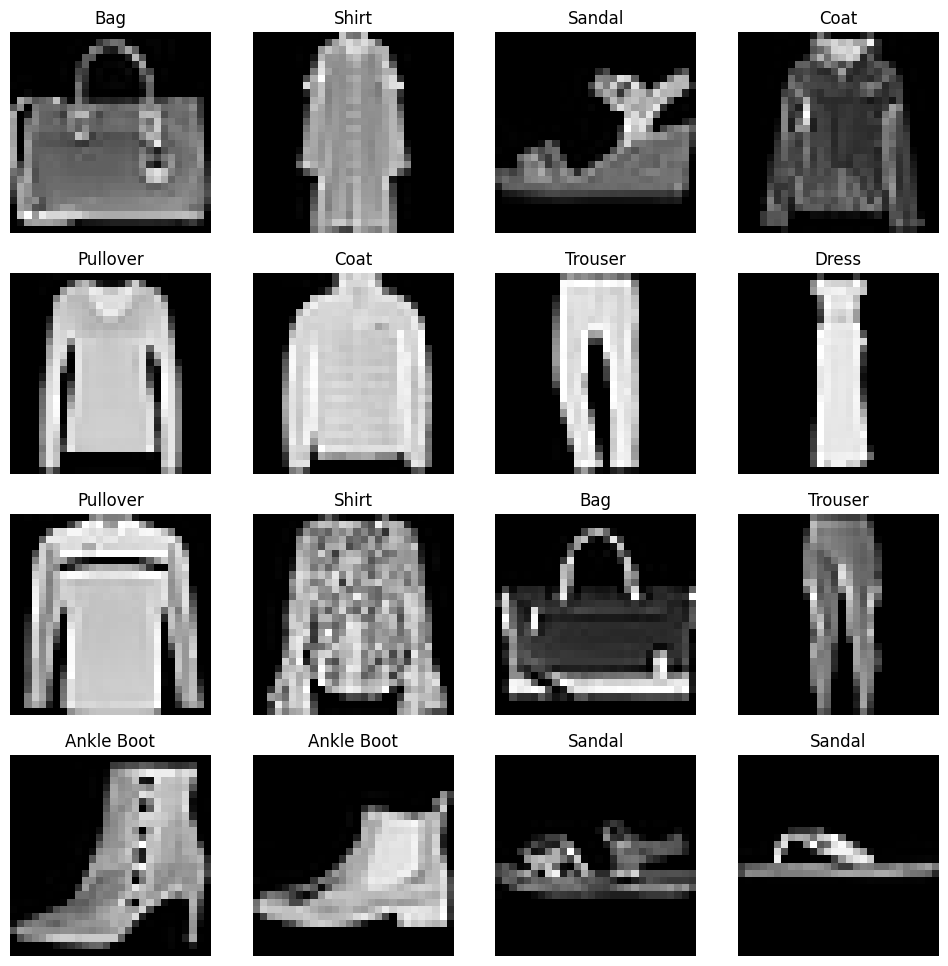

In [185]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

### 모델 정의 및 파라미터

In [187]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features
    
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [188]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [189]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[ 0.0416,  0.0210,  0.1099, -0.0376,  0.0503,  0.0878, -0.0598,  0.1164,
         -0.2027, -0.0919]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [190]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [191]:
total_batch = len(train_loader)
print(total_batch)

469


In [192]:
for epoch in range(10):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11528099310398102
Epoch: 1, Iter: 200, Loss: 0.11502764761447906
Epoch: 1, Iter: 300, Loss: 0.11476781141757965
Epoch: 1, Iter: 400, Loss: 0.11448380076885223
Epoch: 2, Iter: 100, Loss: 0.1136575893163681
Epoch: 2, Iter: 200, Loss: 0.11247376894950867
Epoch: 2, Iter: 300, Loss: 0.10950293684005738
Epoch: 2, Iter: 400, Loss: 0.09870483696460725
Epoch: 3, Iter: 100, Loss: 0.0551985048353672
Epoch: 3, Iter: 200, Loss: 0.04383248341083527
Epoch: 3, Iter: 300, Loss: 0.03894520992040634
Epoch: 3, Iter: 400, Loss: 0.03822635167837143
Epoch: 4, Iter: 100, Loss: 0.03486537057161331
Epoch: 4, Iter: 200, Loss: 0.03451033066213131
Epoch: 4, Iter: 300, Loss: 0.03356761798262596
Epoch: 4, Iter: 400, Loss: 0.032918491184711456
Epoch: 5, Iter: 100, Loss: 0.032222096413373945
Epoch: 5, Iter: 200, Loss: 0.03161971588432789
Epoch: 5, Iter: 300, Loss: 0.031264956638216976
Epoch: 5, Iter: 400, Loss: 0.030117733031511308
Epoch: 6, Iter: 100, Loss: 0.029221600607037546
Epoch: 6, 

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [193]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [194]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [195]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [196]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()
    
    fig = plt.figure(figsize=(16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

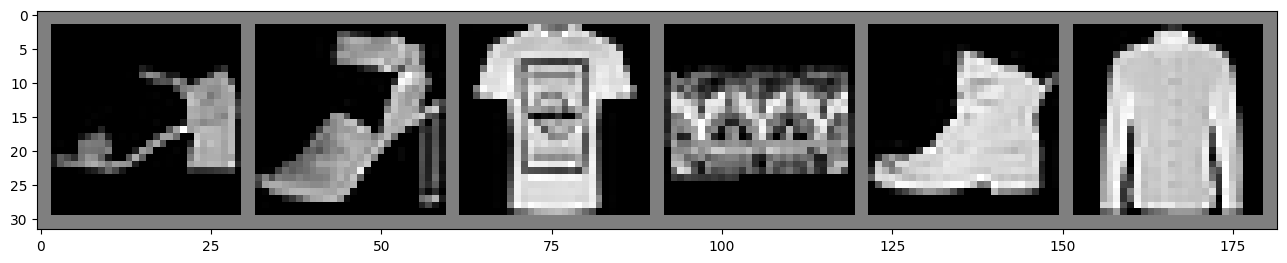

In [200]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [202]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([5, 5, 0, 8, 9, 6, 8, 1, 2, 8, 9, 9, 9, 5, 7, 5, 6, 8, 7, 0, 4, 9, 0, 7,
        0, 3, 1, 3, 3, 9, 0, 6, 1, 8, 9, 2, 6, 5, 9, 1, 7, 9, 0, 4, 8, 9, 7, 4,
        3, 1, 9, 3, 8, 5, 1, 1, 4, 5, 7, 4, 4, 9, 9, 4, 4, 4, 1, 9, 7, 1, 5, 5,
        8, 3, 2, 9, 8, 0, 6, 7, 2, 2, 7, 6, 9, 7, 2, 2, 6, 1, 5, 9, 7, 5, 0, 0,
        0, 0, 4, 2, 2, 9, 4, 1, 3, 2, 3, 4, 9, 2, 0, 3, 1, 8, 0, 9, 0, 4, 7, 6,
        0, 0, 7, 5, 7, 6, 7, 8])


In [203]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sandal, Sandal, T-Shirt, Bag, Ankle Boot, Shirt, 


In [204]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

81.96
